In [11]:
# NLP and ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
sms_data = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only necessary columns and rename them
sms_data = sms_data[['v1', 'v2']]
sms_data.columns = ['label', 'message']

# Check the first few rows
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Convert 'ham' and 'spam' to 0 and 1
sms_data['label_encoded'] = sms_data['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Count of each class
sms_data['label_encoded'].value_counts()

label_encoded
0    4825
1     747
Name: count, dtype: int64

In [14]:
# Split message and label
X_msg = sms_data['message']
y_lbl = sms_data['label_encoded']

# Split into training and test sets
X_train_msg, X_test_msg, y_train_lbl, y_test_lbl = train_test_split(X_msg, y_lbl, test_size=0.3, random_state=0)


In [15]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.85)
X_train_vect = tfidf.fit_transform(X_train_msg)
X_test_vect = tfidf.transform(X_test_msg)

In [16]:
# Train Naive Bayes model
spam_detector = MultinomialNB()
spam_detector.fit(X_train_vect, y_train_lbl)

# Predict on test data
predicted_lbl = spam_detector.predict(X_test_vect)

In [17]:
# Print metrics
print("Model Accuracy:", accuracy_score(y_test_lbl, predicted_lbl))
print("\nReport:\n", classification_report(y_test_lbl, predicted_lbl))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_lbl, predicted_lbl))

Model Accuracy: 0.9641148325358851

Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672


Confusion Matrix:
 [[1434    0]
 [  60  178]]


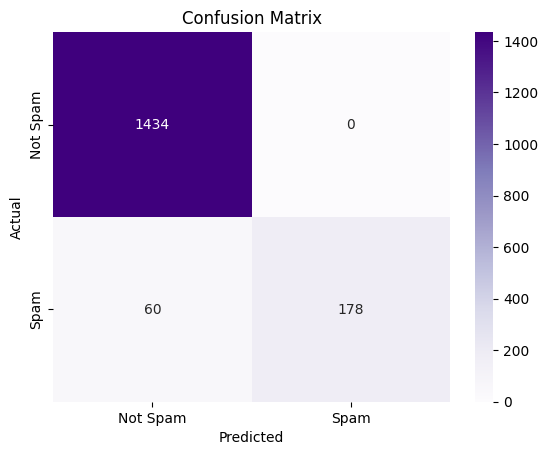

In [18]:
cm = confusion_matrix(y_test_lbl, predicted_lbl)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
import joblib
joblib.dump(spam_detector, 'spam_classifier_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [20]:
# Load data with correct encoding
sms_data = pd.read_csv("spam.csv", encoding='latin-1')

# Rename and keep only useful columns
sms_data = sms_data[['v1', 'v2']]
sms_data.columns = ['label', 'message']

# Preview data
sms_data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Load data with correct encoding
sms_data = pd.read_csv("spam.csv", encoding='latin-1')

# Rename and keep only useful columns
sms_data = sms_data[['v1', 'v2']]
sms_data.columns = ['label', 'message']

# Preview data
sms_data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
